# Case Study 2

## Importing Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Checking Directory

In [5]:
!pwd

/c/Users/adity/Downloads/Coding/MACHINE-LEARNING/Case-Study-2


### Unzip folder 

In [7]:
# !unzip fyntra.zip   #only run one time 

## Loading Dataset  

In [9]:
df = pd.read_csv('dataset/FyntraCustomerData.csv')

In [10]:
df.head(3)

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Checking Correlation: 
#### 1 reprent higly correlated with given variable(upward or positive)
#### 0 represent no correlation(scatter points)
#### -1 represent negative strong correlation(downward) 
#### between 1 and 0 represent some nearby correlation

In [14]:
df.corr(numeric_only=True)

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


### Using Heatmap to Understand Correlation well
#### dark red represent strong positive correlation
#### light red or orange represent nearby strong correlation
#### dark blue represent strong negative correlation
#### light blue represent nearby negative strong correlation
#### grey or white reprent no correlation

<Axes: >

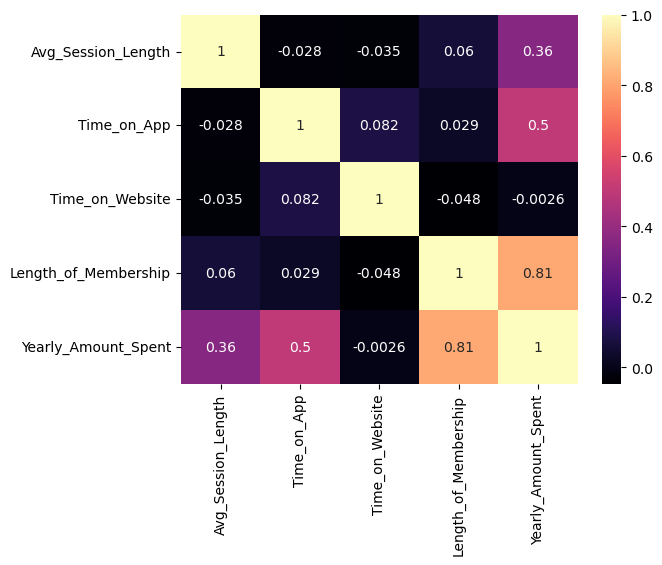

In [16]:
sns.heatmap(df.corr(numeric_only=True), cmap = 'magma', annot = True)

# Task From Here

## 1. Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?

##### Yearly Amount Spent Over Time on Website

Text(0.5, 0.98, 'Yearly Amount Spent Over Time on Website')

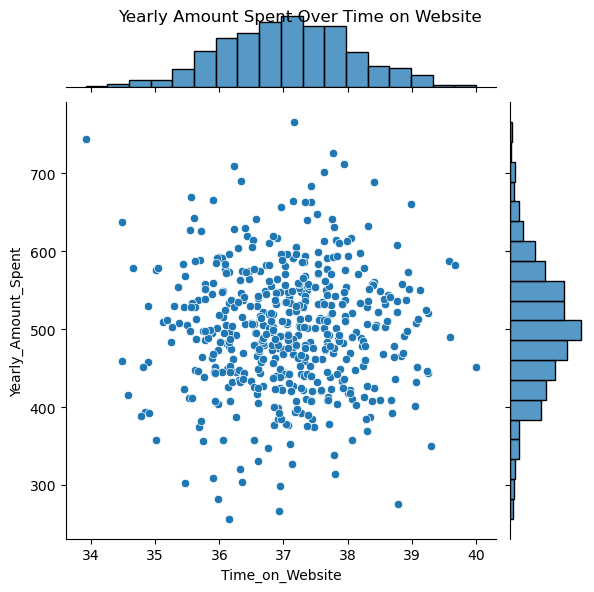

In [19]:
sns.jointplot(data = df, x = 'Time_on_Website', y = 'Yearly_Amount_Spent', kind = 'scatter')
plt.suptitle('Yearly Amount Spent Over Time on Website')

## 2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?

Text(0.5, 0.98, 'Yearly Amount Spent over Time on App')

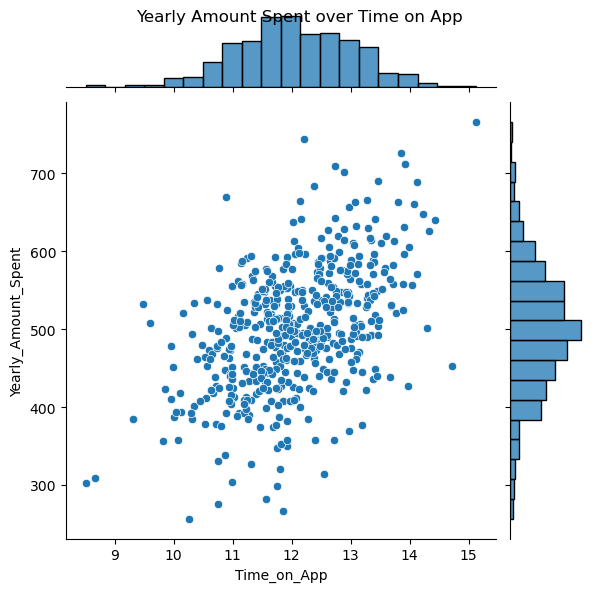

In [21]:
sns.jointplot(data = df, x = 'Time_on_App', y = 'Yearly_Amount_Spent', kind = 'scatter')
plt.suptitle('Yearly Amount Spent over Time on App')

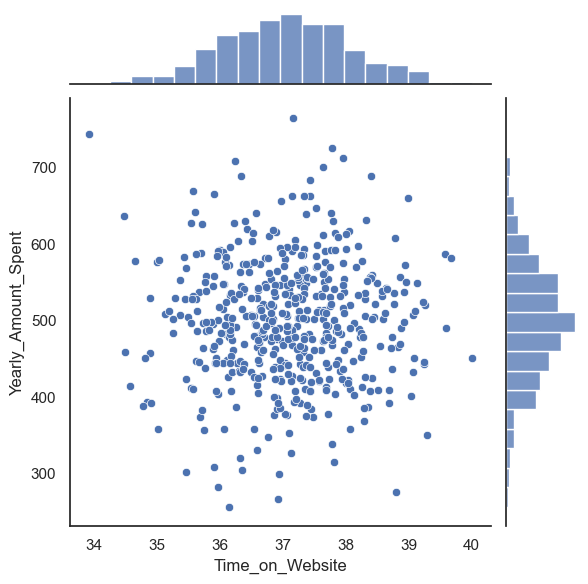

In [22]:
df_Time_web_Amount = df.filter(
    ["Time_on_Website", "Yearly_Amount_Spent"]
)
sns.set(style="white", color_codes=True)
sns.color_palette()
sns.jointplot(x="Time_on_Website", y="Yearly_Amount_Spent", data=df_Time_web_Amount)

In [23]:
df_Time_web_Amount.corr()

,Time_on_Website,Yearly_Amount_Spent
Time_on_Website,1.000000,-0.002641
Yearly_Amount_Spent,-0.002641,1.000000


<Axes: >

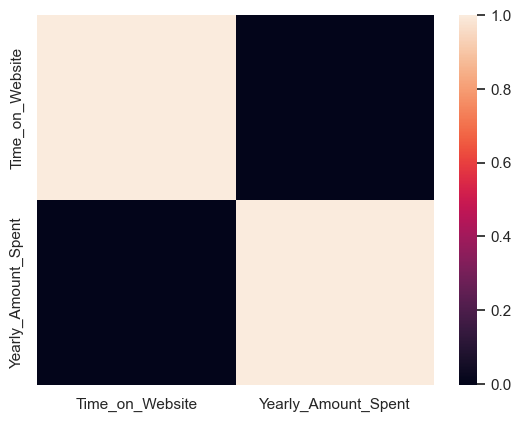

In [24]:
sns.heatmap(df_Time_web_Amount.corr())

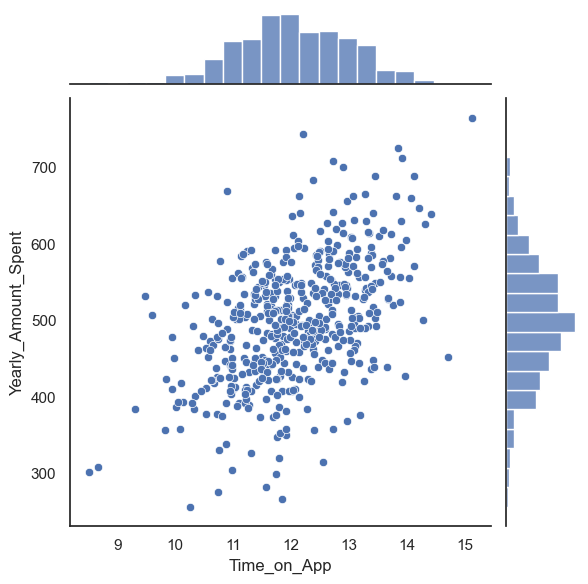

In [25]:
df_Time_App_Amount = df.filter(
    ["Time_on_App", "Yearly_Amount_Spent"]
)
sns.set(style="white", color_codes=True)
sns.color_palette()
sns.jointplot(x="Time_on_App", y="Yearly_Amount_Spent", data=df_Time_App_Amount)

In [26]:
df_Time_App_Amount.corr()

,Time_on_App,Yearly_Amount_Spent
Time_on_App,1.000000,0.499328
Yearly_Amount_Spent,0.499328,1.000000


<Axes: >

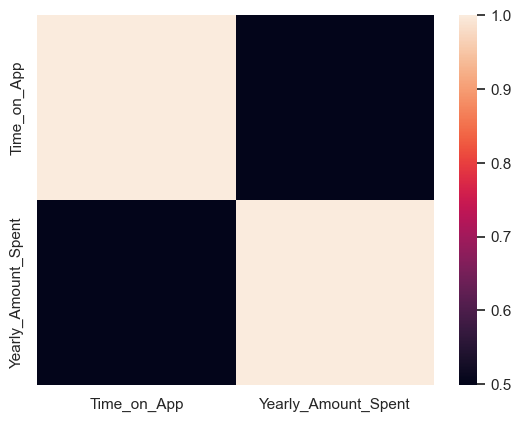

In [27]:
sns.heatmap(df_Time_App_Amount.corr())

In [28]:
coff_time_web_Amount = df_Time_App_Amount.corr()

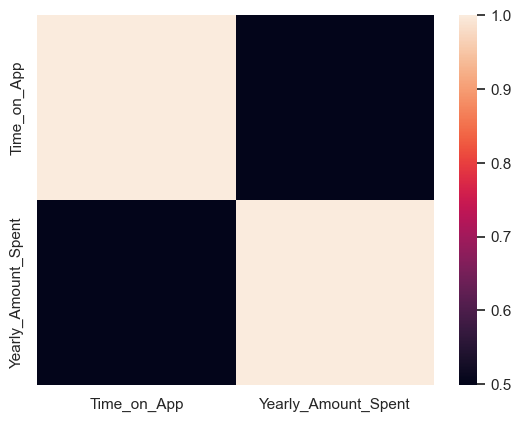

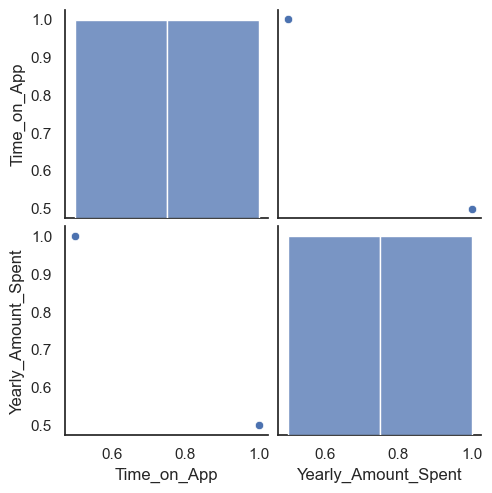

In [29]:
sns.heatmap(coff_time_web_Amount)
sns.pairplot(coff_time_web_Amount)

## 3. Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

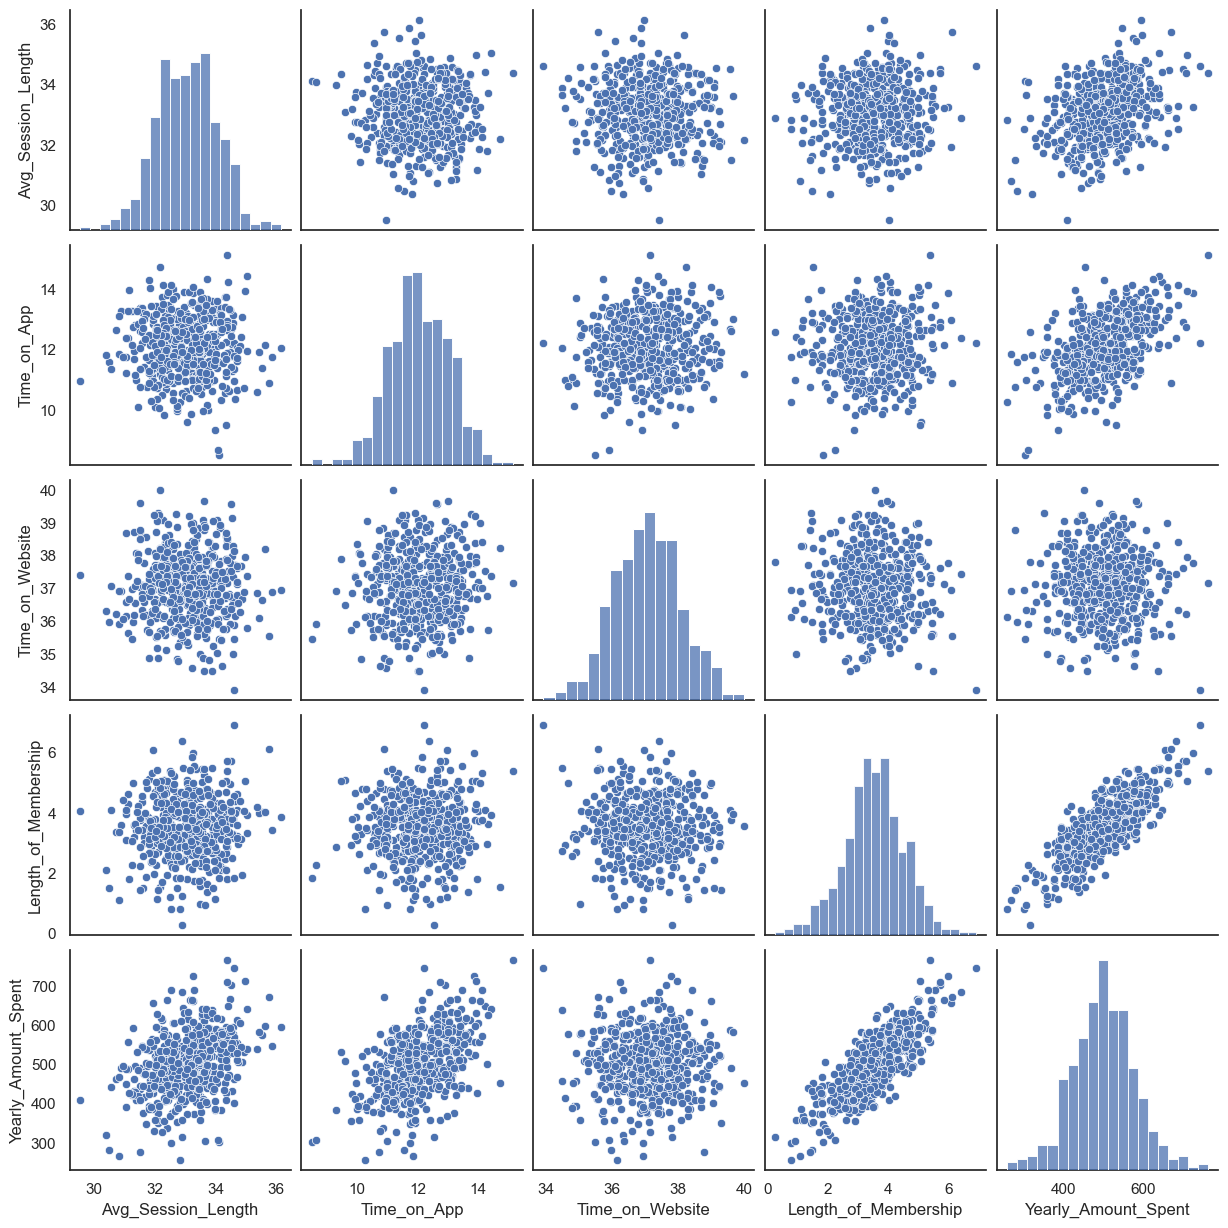

In [31]:
sns.pairplot(df)

In [32]:
# sns.pairplot(df, kind = 'reg')

In [33]:
# sns.pairplot(df, hue = 'Yearly_Amount_Spent', palette='magma', diag_kind=None)

In [34]:
# sns.pairplot(df, diag_kws={'color':'red'})

In [35]:
# sns.pairplot(df, diag_kind='kde', kind='reg')
# # Kernal Density Estimation

In [36]:
# sns.pairplot(df, diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})

## 4. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

Text(0.5, 0.98, 'Yearly Amount Spent Over Length of Membership')

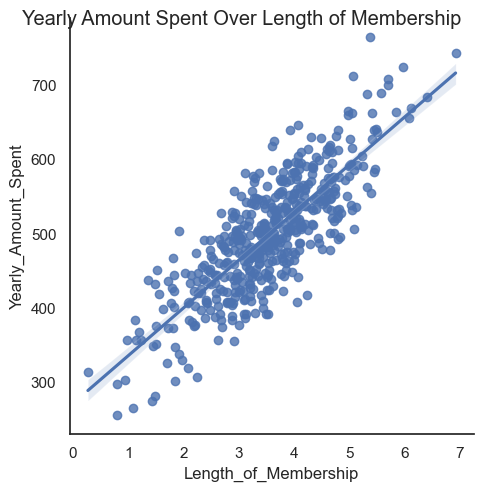

In [38]:
sns.lmplot(data=df,x='Length_of_Membership',y='Yearly_Amount_Spent')
plt.suptitle('Yearly Amount Spent Over Length of Membership')

In [39]:
# sns.regplot(data=df,x='Yearly_Amount_Spent',y='Length_of_Membership')
# plt.suptitle('Length of Membership over Yearly Amount Spent')

In [40]:
# model = linear_model.LinearRegression()
# model.fit('df')

In [41]:
df.head(2)

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [42]:
df.shape

(500, 8)

## 5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?

## Train Test Split

In [45]:
X=df[['Length_of_Membership']]  # X -> Features
Y=df['Yearly_Amount_Spent']      # Y --> Target

In [46]:
X

,Length_of_Membership
0,4.082621
1,2.664034
2,4.104543
3,3.120179
4,4.446308
...,...
495,3.746573
496,3.576526
497,4.958264
498,2.336485


In [47]:
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620146
498    456.469510
499    497.778642
Name: Yearly_Amount_Spent, Length: 500, dtype: float64

## Now Split Data after extracting Features and Target

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=85)

##### x train -->  training data of feature
##### x test --> testing data of feature
##### y train --> treaining data of target
##### y test --> testing data of target
##### y test is used to check variation

In [51]:
x_train

,Length_of_Membership
92,3.997255
214,1.139094
394,3.772969
475,4.301996
330,4.078308
...,...
51,2.952669
196,1.503854
397,3.488030
160,3.309182


In [52]:
y_train

92     515.828815
214    357.863719
394    557.608262
475    535.321610
330    442.064414
          ...    
51     442.667252
196    352.550108
397    547.709989
160    468.913501
362    384.326057
Name: Yearly_Amount_Spent, Length: 350, dtype: float64

In [53]:
x_test

,Length_of_Membership
412,3.013033
266,3.784273
309,1.838211
212,3.843849
105,2.926940
...,...
495,3.746573
32,4.343063
285,3.049196
395,3.420150


In [54]:
y_test

412    444.053827
266    554.003093
309    302.189548
212    536.130897
105    497.513683
          ...    
495    573.847438
32     588.712605
285    471.602884
395    484.876965
410    608.271817
Name: Yearly_Amount_Spent, Length: 150, dtype: float64

## 6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match? 

In [56]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [57]:
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)

In [58]:
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Actual vs. Predicted')

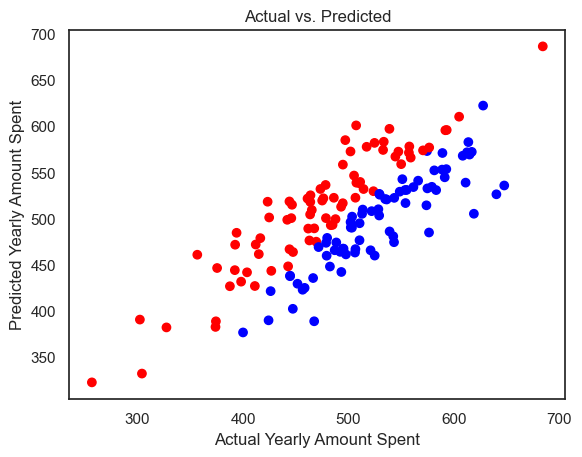

In [59]:
import matplotlib.pyplot as plt
import numpy as np

colors=np.where(y_pred>y_test,'red','blue')
plt.scatter(y_test, y_pred, c=colors)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs. Predicted")

In [60]:
mse = mean_squared_error(y_test, y_pred)
mse

2005.008450066019

In [61]:
rmse = sqrt(mse)
rmse

44.77732071111467

In [62]:
result = pd.DataFrame({'Actual Yearly Amount Spent': y_test, 'Predicted Yearly Amount Spent': y_pred})
print("Comparison of Actual and Predicted Tips:")
print(result.head())

Comparison of Actual and Predicted Tips:
     Actual Yearly Amount Spent  Predicted Yearly Amount Spent
412                  444.053827                     466.633075
266                  554.003093                     516.642027
309                  302.189548                     390.455020
212                  536.130897                     520.505057
105                  497.513683                     461.050661


# Home work
### Train Test Split 

# All Documentation and Reference
#### Color Palette --> https://seaborn.pydata.org/tutorial/color_palettes.html
#### Pairplot --> https://seaborn.pydata.org/generated/seaborn.pairplot.html
#### Joint Plot --> https://seaborn.pydata.org/generated/seaborn.jointplot.html
#### Linear Model --> https://scikit-learn.org/stable/modules/linear_model.html
#### Correlation, Heatmap, Pairplot --> https://www.youtube.com/watch?v=6oD_zGW7FBQ
#### linear regression plot --> https://seaborn.pydata.org/tutorial/regression.html 


#### Join Plot: we use join plot because it is used to plot two variable name by combining scatter plot and histogram plot

##### https://www.youtube.com/watch?v=1NjLMWSGosI 



# Train-Test Split: A Comprehensive Guide

## 1. Introduction

In machine learning, our goal is to build models that not only learn from the data we provide but also perform well on new, unseen data. To simulate how a model will perform in the real world, we split our dataset into separate parts:
- **Training Set:** Used to "teach" the model by letting it learn patterns from the data.
- **Test Set:** Used to evaluate how well the model generalizes to new data.

This guide explains what a train-test split is, why it is important, and how you can implement it with an example using a real dataset.

---

## 2. Key Concepts

### What Is a Train-Test Split?

- **Training Set (x_train, y_train):**
  - **x_train:** Contains the input features (independent variables) that the model uses during training.
  - **y_train:** Contains the corresponding true outputs (labels or dependent variables) that the model is trying to predict.
  - **Purpose:** The model “learns” the relationship between x_train and y_train by adjusting its parameters (like weights in linear regression).

- **Test Set (x_test, y_test):**
  - **x_test:** Contains input features from unseen data.
  - **y_test:** Contains the true outputs for the test set.
  - **Purpose:** After training, the model makes predictions using x_test. By comparing these predictions to y_test (the ground truth), you can evaluate the model’s performance.

### Why Do We Split the Data?

- **Prevent Overfitting:**  
  Training and testing on the same data might lead the model to simply memorize the data instead of learning to generalize. A separate test set helps check that the model performs well on new data.

- **Accurate Model Evaluation:**  
  The test set serves as a proxy for future, unseen data. Evaluating the model on x_test and comparing predictions to y_test provides an unbiased measure of performance using metrics such as accuracy, mean squared error (MSE), etc.

- **Reproducibility:**  
  By setting a random seed (using parameters like `random_state`), you can ensure that the split remains consistent each time you run your code.

---

## 3. Practical Example Using Seaborn’s “tips” Dataset

In this example, we use the “tips” dataset from Seaborn. The dataset contains information about restaurant bills, including columns like “total_bill” and “tip.” We will use the total bill to predict the tip amount.

### Step-by-Step Code Example

```python
# Import necessary libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Load the 'tips' dataset from Seaborn
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print("Tips Dataset:")
print(tips.head(), "\n")

# 2. Define input features (X) and target variable (y)
# We will predict the tip based on the total bill.
X = tips[['total_bill']]  # Using double brackets to create a 2D array (required by scikit-learn)
y = tips['tip']

# 3. Split the data into training and test sets
# 75% for training and 25% for testing. random_state ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape (features, labels):", X_train.shape, y_train.shape)
print("Test set shape (features, labels):", X_test.shape, y_test.shape, "\n")

# 4. Train a Linear Regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse, "\n")

# 7. Optional: Compare actual tip values to predicted values
result = pd.DataFrame({'Actual Tip': y_test, 'Predicted Tip': y_pred})
print("Comparison of Actual and Predicted Tips:")
print(result.head())
```

### Explanation of the Code

1. **Loading the Dataset:**  
   We load the Seaborn “tips” dataset, which contains data on restaurant bills. This dataset includes the features such as “total_bill” and “tip.”

2. **Defining Features and Target:**  
   - **X:** We select the “total_bill” column as our feature since we want to predict the tip based on it.
   - **y:** We select the “tip” column as our target variable (the output we want to predict).

3. **Splitting the Data:**  
   We use `train_test_split` to divide the dataset into:
   - **Training Data (X_train, y_train):** Used to train the model.
   - **Test Data (X_test, y_test):** Used to evaluate the model’s performance on unseen data.
   The parameter `random_state=42` ensures that the data is split the same way every time the code is run.

4. **Training the Model:**  
   A Linear Regression model is trained on the training data. The model learns the relationship between total bill and tip amount.

5. **Making Predictions:**  
   The model uses the test features (x_test) to predict tip amounts, generating a set of predictions (y_pred).

6. **Evaluating Performance:**  
   We calculate the Mean Squared Error (MSE) between the actual tip values (y_test) and the predicted values (y_pred) to measure the model’s performance.

7. **Result Comparison:**  
   A small table is printed to compare actual tip values with the predicted ones, offering insight into how well the model performed.

# HomeWork

#### Boston Housing Dataset